<a href="https://colab.research.google.com/github/aviancady/dicoding_brendha/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data**

## **Menyiapkan semua library yang dibutuhkan**

In [2]:
# DataFrame Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
import matplotlib.image as mpimg
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
import datetime as dt

## **Data Wrangling**

### **Gathering Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
customers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [130]:
geolocation_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [180]:
product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [181]:
products_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## **Assessing Data**

### **Menilai Customers_dataset_df**

In [13]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_dataset_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### **Menilai geolocation_dataset_df**

In [17]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_dataset_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [19]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  261831


In [20]:
geolocation_dataset_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### **Menilai order_items_dataset_df**

In [21]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_dataset_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [23]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### **Menilai order_payments_dataset_df**

In [25]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_dataset_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [27]:
print("Jumlah duplikasi: ", order_payments_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
order_payments_dataset_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### **Menilai order_reviews_dataset_df**

In [29]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_dataset_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [31]:
print("Jumlah duplikasi: ", order_reviews_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
order_reviews_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### **Menilai orders_dataset_df**

In [33]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [35]:
print("Jumlah duplikasi: ", orders_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### **Menilai product_category_name_translation_df**

In [38]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
product_category_name_translation_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [41]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### **Menilai products_dataset_df**

In [43]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [44]:
products_dataset_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [45]:
print("jumlah duplikasi: " , products_dataset_df.duplicated().sum())

jumlah duplikasi:  0


In [46]:
products_dataset_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### **Menilai sellers_dataset_df**

In [47]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
sellers_dataset_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [49]:
print("jumlah duplikasi: " , sellers_dataset_df.duplicated().sum())

jumlah duplikasi:  0


In [50]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## **Visualization & Explanatory Analysis**

### **Customers dataset**

In [114]:
customers_dataset_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [115]:
customers_dataset_df.duplicated().sum()

0

In [116]:
customers_dataset_df.nunique(axis=0)

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [117]:
customers_dataset_df.nunique(axis=0)

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [118]:
customers_dataset_df.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

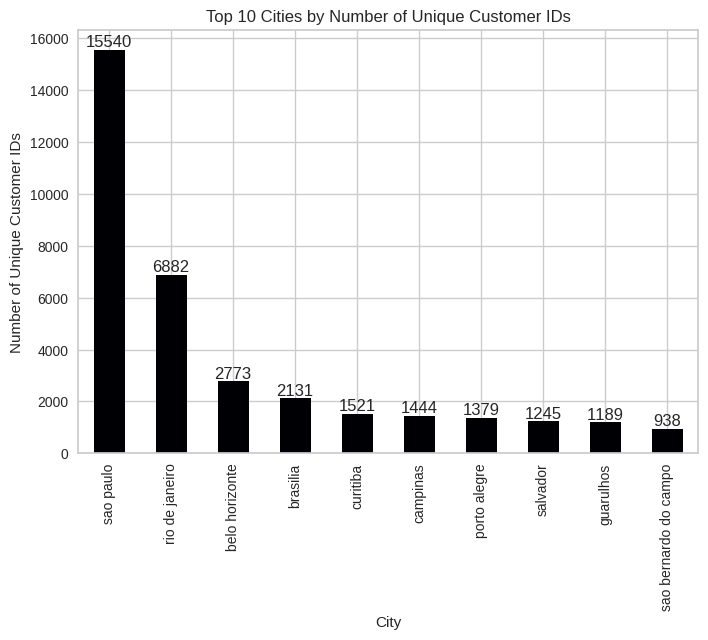

In [120]:
top_cities = customers_dataset_df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).head(10)

# Plotting the bar chart for top 10 values
top_cities.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 Cities by Number of Unique Customer IDs')
plt.xlabel('City')
plt.ylabel('Number of Unique Customer IDs')

# Display the numeric data values on top of the bars
for index, value in enumerate(top_cities):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Sau Paulo (city) had the most number of unique customers

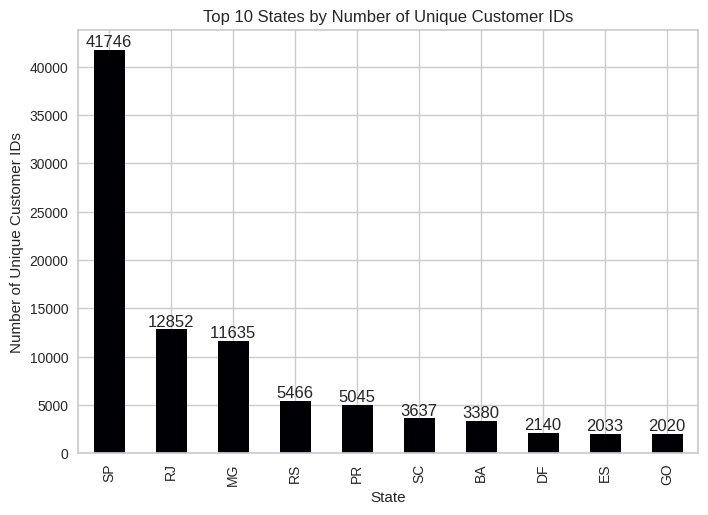

In [121]:
top_states = customers_dataset_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10)

top_states.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 States by Number of Unique Customer IDs')
plt.xlabel('State')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_states):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

SP had the most number of unique customers.

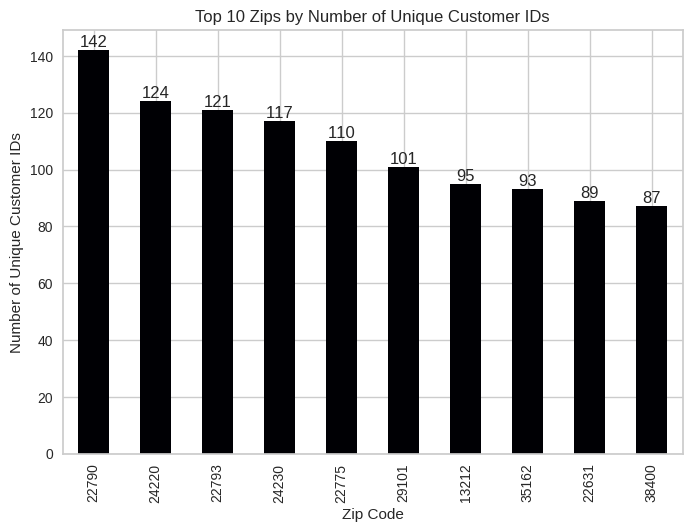

In [123]:
top_zip = customers_dataset_df.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False).head(10)

top_zip.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 10 Zips by Number of Unique Customer IDs')
plt.xlabel('Zip Code')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_zip):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Products were delivered most frequently to zip code 22790

In [125]:
# Group data by customer_unique_id
customers_dataset_df.groupby('customer_unique_id').agg(unique_orders=('customer_id', 'nunique'), unique_customers=('customer_unique_id', 'nunique')).reset_index().sort_values(by='unique_orders', ascending=False).head(5)

,customer_unique_id,unique_orders,unique_customers
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,1
23472,3e43e6105506432c953e165fb2acf44c,9,1
37797,6469f99c1f9dfae7733b25662e7f1782,7,1
76082,ca77025e7201e3b30c44b472ff346268,7,1
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1


Customer '8d50f5eadf50201ccdcedfb9e2ac8455' has the highest count of unique orders.

### **Geolocation dataset**

In [131]:
geolocation_dataset_df.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [132]:
geolocation_dataset_df.nunique(axis=0)

,0
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27


Geolocation dataset has 8011 cities across 27 states.

### **Order items**

In [134]:
order_items_dataset_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [136]:
order_items_dataset_df.duplicated().sum()

0

In [137]:
order_items_dataset_df.nunique(axis=0)

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


In [139]:
# to change format of date & time in required column
order_items_dataset_df['shipping_limit_date'] = pd.to_datetime(order_items_dataset_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

According to dataset description provided, we need to calculate the following:

In [141]:
# Total value of items for each order, calculated by multiplying the item price by the number of items in the order.
order_items_dataset_df['total_order_item_value'] = order_items_dataset_df['price'] * order_items_dataset_df['order_item_id']

# Total freight value for each order, calculated by multiplying the freight value by the number of items in the order.
order_items_dataset_df['total_freight_value'] = order_items_dataset_df['freight_value'] * order_items_dataset_df['order_item_id']

In [143]:
# Total order value for each order, including both the product value and the freight value for each order item.
order_items_dataset_df['total_order_value'] = order_items_dataset_df['total_order_item_value'] + order_items_dataset_df['total_freight_value']

In [144]:
order_items_dataset_df['total_order_value'].describe()

,total_order_value
count,112650.000000
mean,160.304175
std,228.532489
min,6.080000
25%,61.070000
50%,103.550000
75%,175.870000
max,13664.080000


the average order value was 160.3

To check distribution of total order value:-

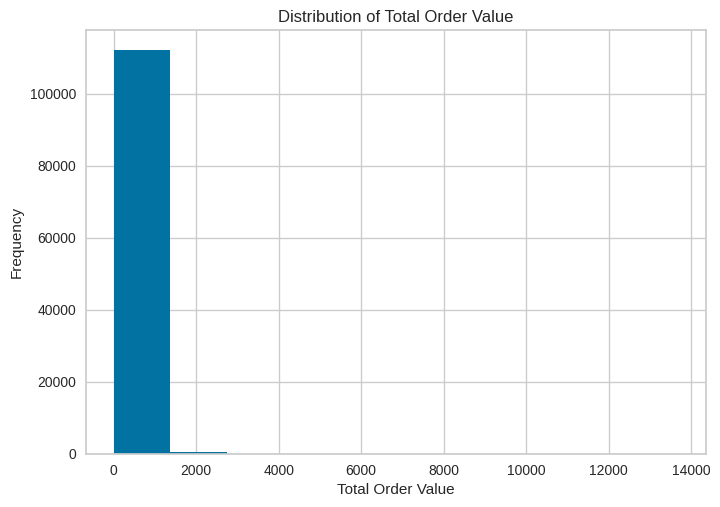

In [145]:
plt.hist(order_items_dataset_df['total_order_value'])
plt.xlabel('Total Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Order Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



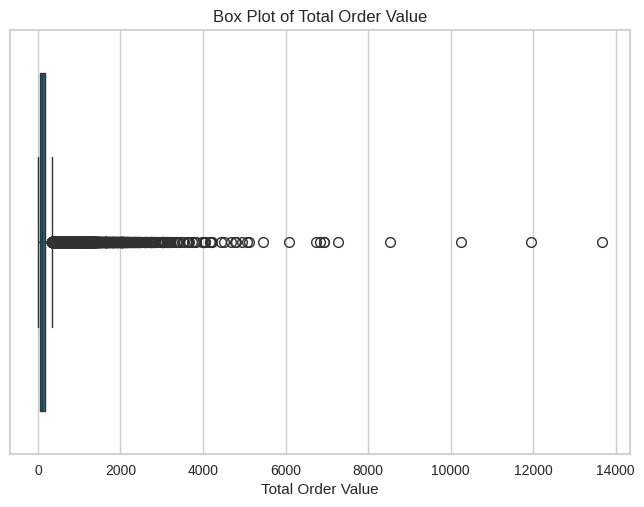

In [146]:
sns.boxplot(x = order_items_dataset_df['total_order_value'])
plt.xlabel('Total Order Value')
plt.title('Box Plot of Total Order Value')
plt.show()

### **Order Payments**

In [147]:
order_payments_dataset_df.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [148]:
order_payments_dataset_df.duplicated().sum()

0

In [149]:
order_payments_dataset_df.nunique(axis=0)

,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


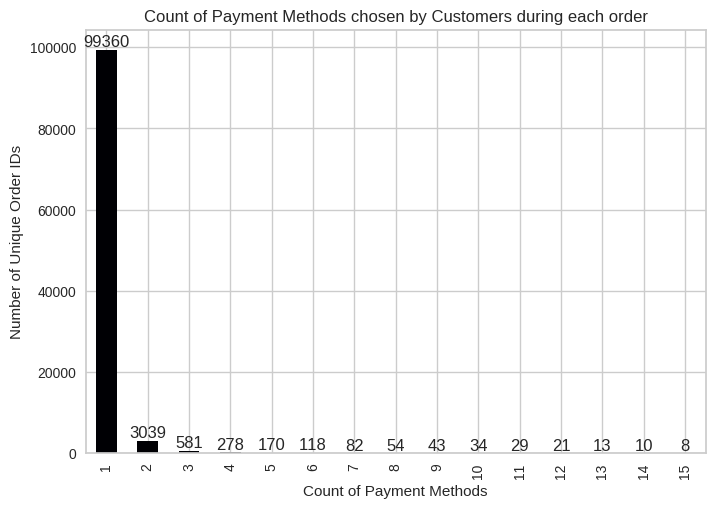

In [151]:
payseq = order_payments_dataset_df.groupby('payment_sequential')['order_id'].nunique().sort_values(ascending=False).head(15)

payseq.plot(kind = 'bar', colormap = 'magma')
plt.title('Count of Payment Methods chosen by Customers during each order')
plt.xlabel('Count of Payment Methods')
plt.ylabel('Number of Unique Order IDs')

for index, value in enumerate(payseq):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

majority of the customers chose a single payment method during each order.

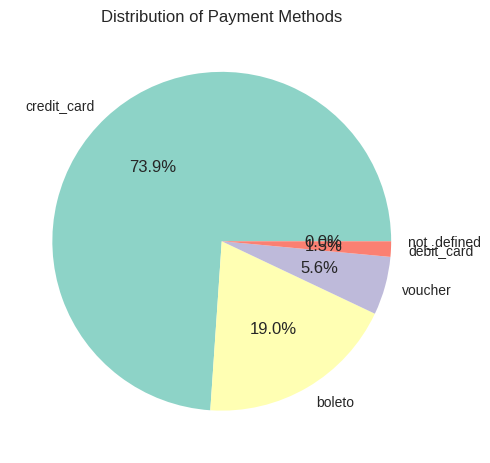

In [152]:
paytype_count = order_payments_dataset_df['payment_type'].value_counts()

# Plotting the pie chart
plt.pie(paytype_count, labels=paytype_count.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Payment Methods')
plt.show()

Credit Cards were a preferred method of payment for majority of orders.

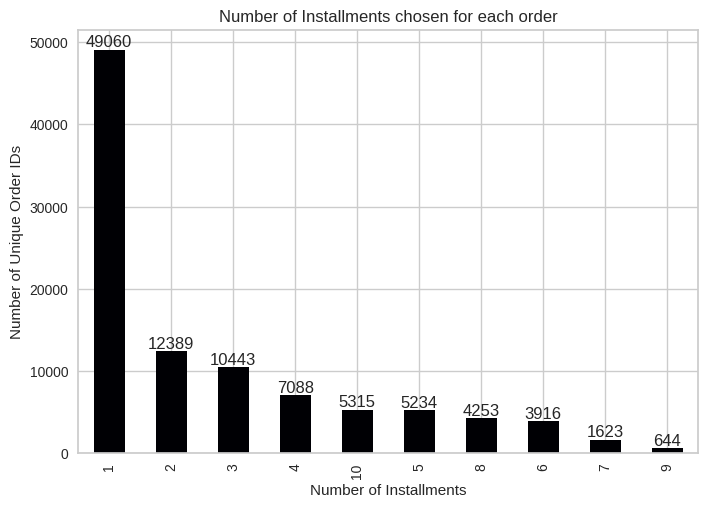

In [153]:
payinstallment = order_payments_dataset_df.groupby('payment_installments')['order_id'].nunique().sort_values(ascending=False).head(10)

payinstallment.plot(kind = 'bar', colormap = 'magma')
plt.title('Number of Installments chosen for each order')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Unique Order IDs')

for index, value in enumerate(payinstallment):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

majority of customers preferred single payment for each order.

### **Order reviews**

In [154]:
order_reviews_dataset_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [155]:
order_reviews_dataset_df.duplicated().sum()

0

In [156]:
order_reviews_dataset_df.nunique(axis=0)

,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


from the unique number of Order IDs and Review IDs, it can be summarised that customers chose not to submit a review for 263 unique purchases.

In [157]:
order_reviews_dataset_df['review_creation_date'] = pd.to_datetime(order_reviews_dataset_df['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
order_reviews_dataset_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_dataset_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')

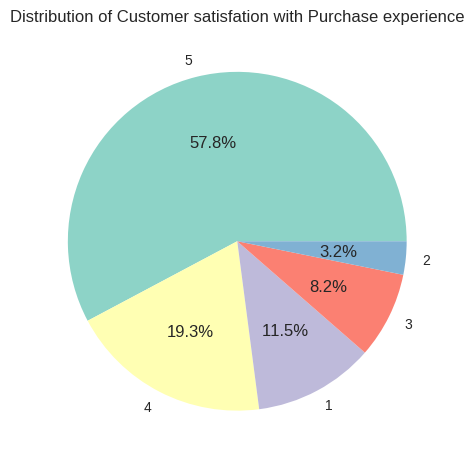

In [158]:
reviewscore = order_reviews_dataset_df['review_score'].value_counts()

# Plotting the pie chart
plt.pie(reviewscore, labels=reviewscore.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Customer satisfation with Purchase experience')
plt.show()

majority of customers were satisfied with the purchase experience, but a significant portion (11.5%) were dissatisfied.

### **Orders dataset**

In [159]:
orders_dataset_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [160]:
orders_dataset_df.nunique(axis=0)

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [162]:
orders_dataset_df['order_purchase_timestamp'] = pd.to_datetime(orders_dataset_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_dataset_df['order_approved_at'] = pd.to_datetime(orders_dataset_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_dataset_df['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_dataset_df['order_delivered_customer_date'] = pd.to_datetime(orders_dataset_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_dataset_df['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

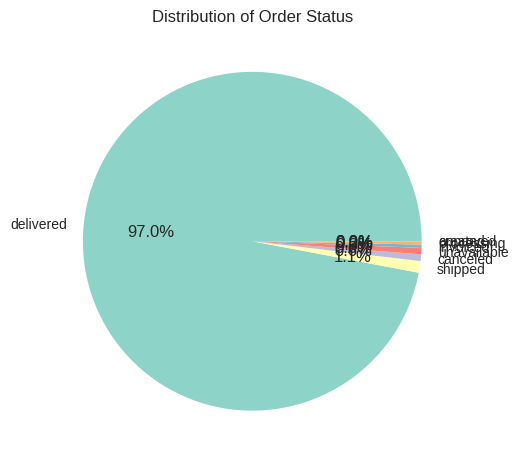

In [163]:
orderstatus = orders_dataset_df['order_status'].value_counts()

plt.pie(orderstatus, labels=orderstatus.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Order Status')
plt.show()

97% of orders had already been delivered, while 1.1% was being shipped.

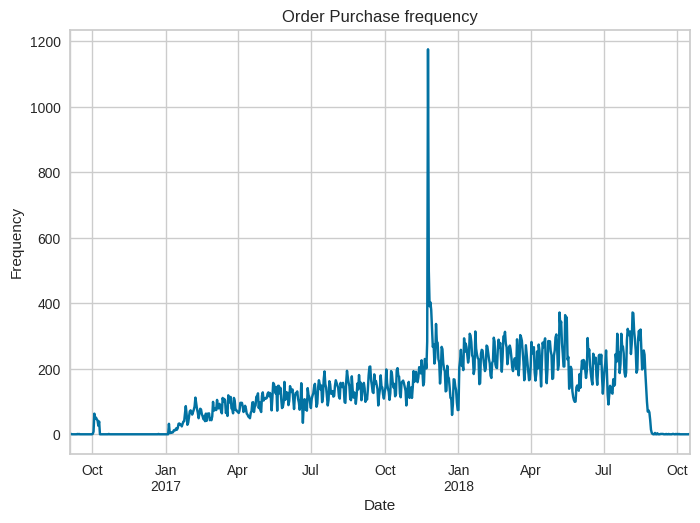

In [164]:
purchase = orders_dataset_df.resample('D', on='order_purchase_timestamp').size()

purchase.plot(kind='line', linestyle='-')
plt.title('Order Purchase frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Purchases peaked during mid-November to mid-December of 2017.

### **Product category name translation**

In [182]:
products = pd.merge(products_dataset_df, product_category_name_translation_df, on='product_category_name', how = 'outer')

In [183]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2
product_category_name_english,623


In [184]:
# Products with null Product Category Names are assigned as "uncategorized"
products['product_category_name'].fillna("uncategorized", inplace=True)
products['product_category_name_english'].fillna("uncategorized", inplace=True)

<ipython-input-184-db53d43d2033>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-184-db53d43d2033>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [185]:
products.nunique(axis=0)

,0
product_id,32951
product_category_name,74
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95
product_category_name_english,72


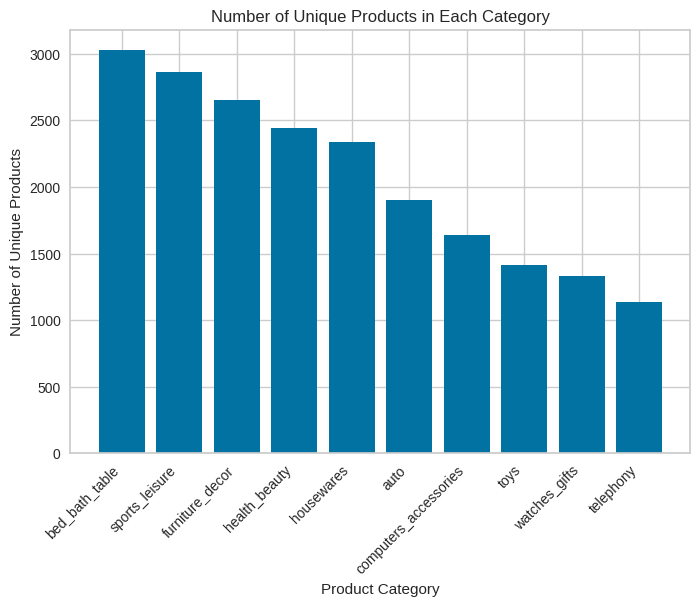

In [186]:
product_counts = products.groupby('product_category_name_english')['product_id'].nunique().sort_values(ascending=False).reset_index().head(10)

plt.bar(product_counts['product_category_name_english'], product_counts['product_id'])
plt.xlabel('Product Category')
plt.ylabel('Number of Unique Products')
plt.title('Number of Unique Products in Each Category')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Sellers Dataset**

In [187]:
sellers_dataset_df.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [188]:
sellers_dataset_df.duplicated().sum()

0

In [189]:
sellers_dataset_df.nunique(axis=0)

,0
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23


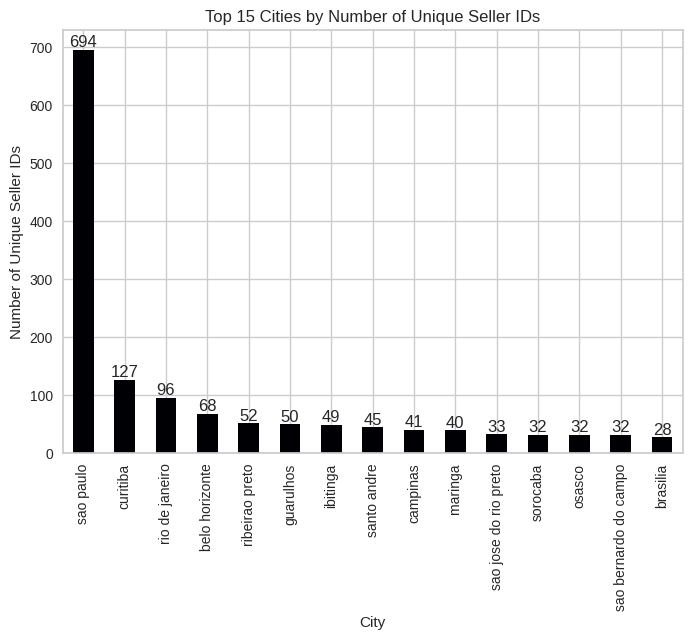

In [190]:
sellercity = sellers_dataset_df.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).head(15)

# Plotting the bar chart for top 10 values
sellercity.plot(kind = 'bar', colormap = 'magma')
plt.title('Top 15 Cities by Number of Unique Seller IDs')
plt.xlabel('City')
plt.ylabel('Number of Unique Seller IDs')

# Display the numeric data values on top of the bars
for index, value in enumerate(sellercity):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Sau Paulo (city) had the most number of unique sellers

### **Exploring the correlation between variables**

In [191]:
data = customers_dataset_df.copy()

In [192]:
data = pd.merge(data, orders_dataset_df, on='customer_id')

In [193]:
data = pd.merge(data, order_items_dataset_df, on='order_id')

In [194]:
data = pd.merge(data, order_payments_dataset_df, on='order_id')

In [195]:
data = pd.merge(data, order_reviews_dataset_df, on='order_id')

In [196]:
data = pd.merge(data, products, on='product_id')

In [197]:
data = pd.merge(data, sellers_dataset_df, on='seller_id')

In [198]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_item_value,total_freight_value,total_order_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,124.99,21.88,146.87,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,289.00,46.48,335.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,139.94,17.79,157.73,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,149.94,23.36,173.30,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29,2018-04-02 18:36:47,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,230.00,22.25,252.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940,ibitinga,SP


In [199]:
Total = data.isnull().sum().sort_values(ascending = False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
review_comment_title,103437,88.159790
review_comment_message,67650,57.658379
order_delivered_customer_date,2471,2.106044
product_photos_qty,1695,1.444656
product_description_lenght,1695,1.444656
product_name_lenght,1695,1.444656
order_delivered_carrier_date,1235,1.052596
product_weight_g,20,0.017046
product_width_cm,20,0.017046
product_height_cm,20,0.017046


In [200]:
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [201]:
data.dropna(axis = 0, inplace = True)

In [202]:
data.shape

(113216, 41)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113216 non-null  object        
 1   customer_unique_id             113216 non-null  object        
 2   customer_zip_code_prefix       113216 non-null  int64         
 3   customer_city                  113216 non-null  object        
 4   customer_state                 113216 non-null  object        
 5   order_id                       113216 non-null  object        
 6   order_status                   113216 non-null  object        
 7   order_purchase_timestamp       113216 non-null  datetime64[ns]
 8   order_approved_at              113216 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113216 non-null  datetime64[ns]
 10  order_delivered_customer_date  113216 non-null  datetime64[ns]
 11  order

Summarizing the data

In [204]:
# Numerical features
pd.set_option('display.max_columns', None)
data.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,total_order_item_value,total_freight_value,total_order_value,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,113216.000000,113216,113216,113216,113216,113216,113216.000000,113216,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216,113216,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,35084.548703,2018-01-01 08:15:45.371563776,2018-01-01 18:41:49.277142528,2018-01-04 14:48:56.103819264,2018-01-13 18:50:41.457806336,2018-01-25 04:17:34.409270784,1.195052,2018-01-07 22:50:09.162247424,119.869740,20.002353,135.637630,23.578836,159.216465,1.090809,2.943515,171.577925,4.082365,2018-01-13 14:12:02.060486144,2018-01-16 17:54:43.573063936,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,24522.449769
min,1003.000000,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,2016-10-08 10:34:01,0.850000,0.000000,0.850000,0.000000,6.080000,1.000000,0.000000,0.000000,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11310.000000,2017-09-13 14:15:18.249999872,2017-09-13 22:05:48.500000,2017-09-15 20:07:55,2017-09-25 18:40:11.500000,2017-10-04 00:00:00,1.000000,2017-09-20 13:28:59.500000,39.900000,13.080000,45.000000,13.750000,61.050000,1.000000,1.000000,60.850000,4.000000,2017-09-26 00:00:00,2017-09-28 01:45:43.249999872,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24315.000000,2018-01-20 10:14:21,2018-01-20 16:00:50,2018-01-24 00:42:35,2018-02-02 02:43:28,2018-02-16 00:00:00,1.000000,2018-01-26 14:15:38.500000,74.900000,16.320000,83.200000,17.300000,102.960000,1.000000,2.000000,107.970000,5.000000,2018-02-02 00:00:00,2018-02-05 18:50:10,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58844.250000,2018-05-05 14:34:27.750000128,2018-05-05 21:10:36.249999872,2018-05-08 14:12:00,2018-05-15 20:09:21.500000,2018-05-28 00:00:00,1.000000,2018-05-10 19:50:43.249999872,132.985000,21.190000,149.870000,24.960000,175.330000,1.000000,4.000000,189.160000,5.000000,2018-05-16 00:00:00,2018-05-20 15:06:40,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28495.000000
max,99980.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,13440.000000,1794.960000,13664.080000,26.000000,24.000000,13664.080000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000
std,29867.207356,NaN,NaN,NaN,NaN,NaN,0.687474,NaN,181.127416,15.710909,214.152923,24.817259,225.014525,0.686610,2.779137,264.218677,1.346005,NaN,NaN,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,27646.979640


In [205]:
# Categorical features
pd.set_option('display.max_columns', None)
data.describe(include = 'object').T

,count,unique,top,freq
customer_id,113216,94490,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,113216,91484,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,113216,4071,sao paulo,17872
customer_state,113216,27,SP,47823
order_id,113216,94490,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,113216,2,delivered,113209
product_id,113216,31485,aca2eb7d00ea1a7b8ebd4e68314663af,526
seller_id,113216,2909,4a3ca9315b744ce9f8e9374361493884,2093
payment_type,113216,4,credit_card,83545
review_id,113216,94314,eef5dbca8d37dfce6db7d7b16dd0525e,63


1. Cities generating highest orders

<ipython-input-206-23996a64179a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

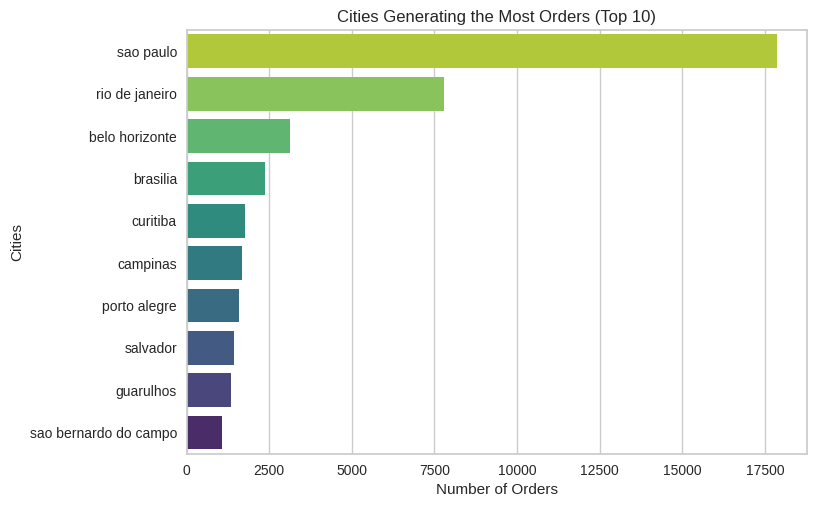

In [206]:
topcities_orders = data.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False).head(10)
sns.barplot(x = "order_id", y = "customer_city", data = topcities_orders, palette = "viridis_r")

plt.xlabel("Number of Orders")
plt.ylabel("Cities")
plt.title("Cities Generating the Most Orders (Top 10)")
plt.show()

2. Cities generating most revenue

<ipython-input-207-3c019a43a7f1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

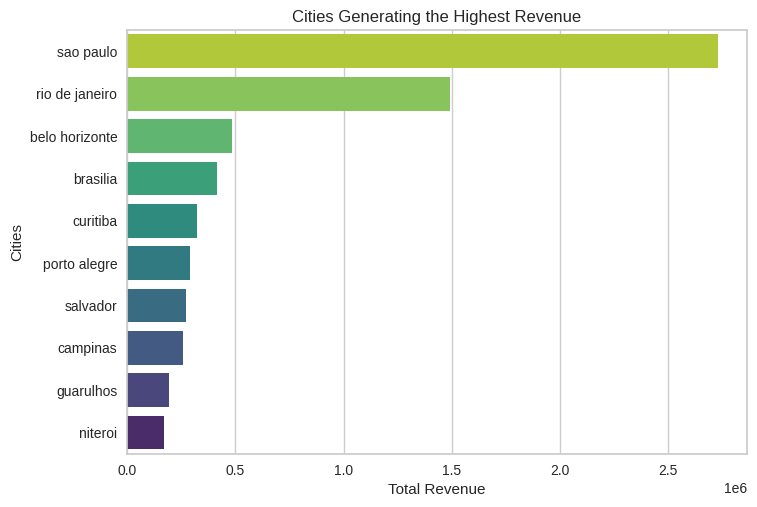

In [207]:
topcities_revenue = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "customer_city", data = topcities_revenue, palette = 'viridis_r')
plt.xlabel("Total Revenue")
plt.ylabel("Cities")
plt.title("Cities Generating the Highest Revenue")
plt.show()

3. Product Categories with highest & lowest number of orders

<ipython-input-208-b9d3458a5336>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

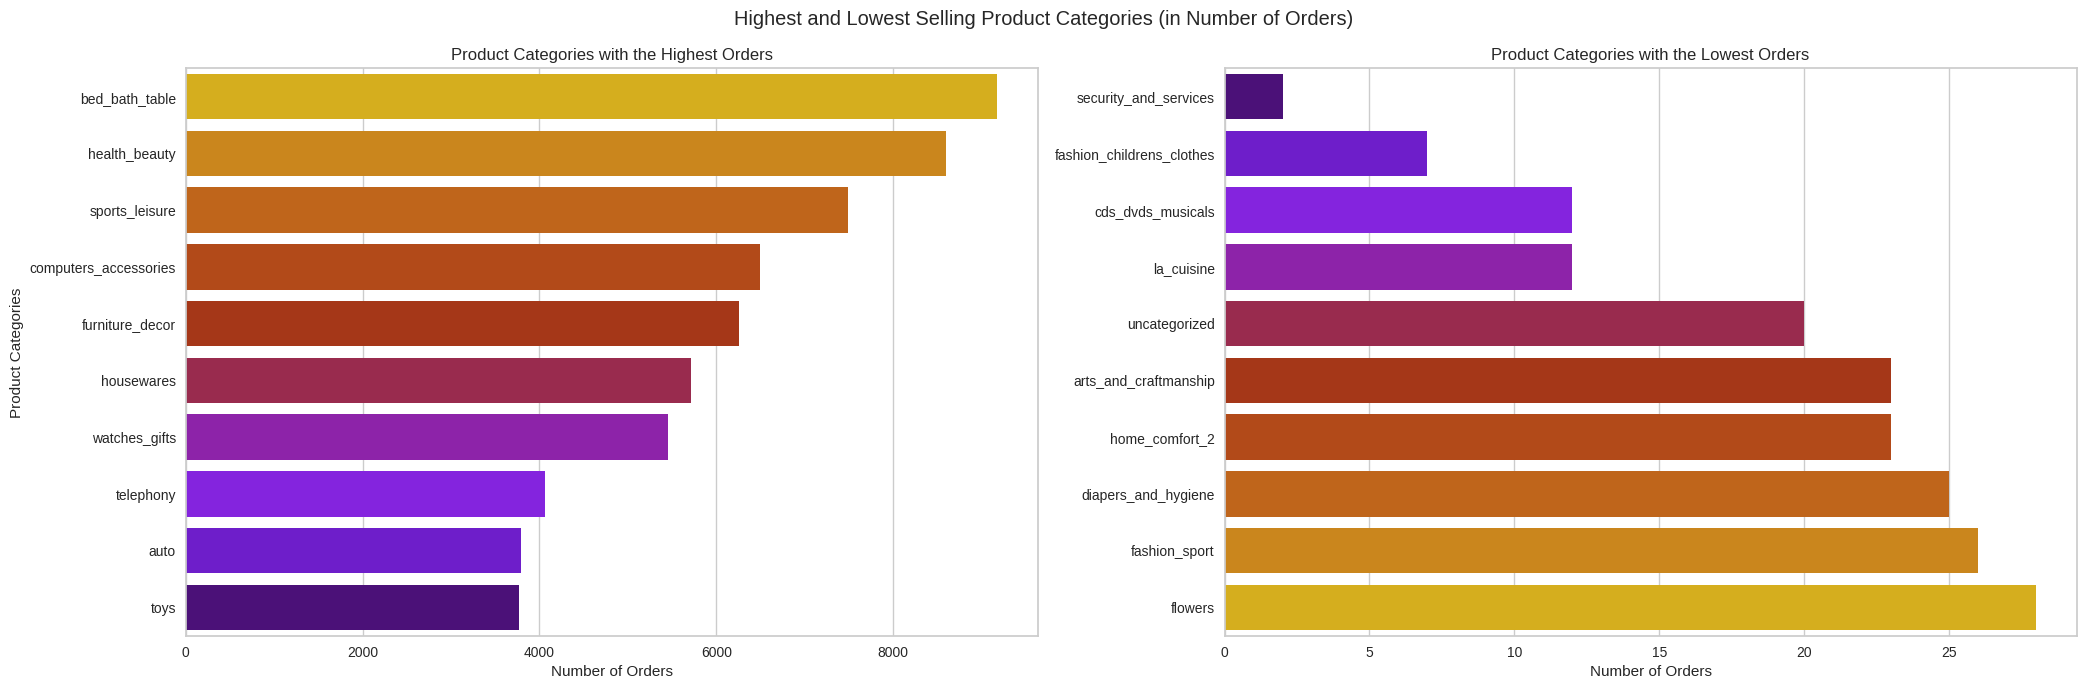

In [208]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest no. of orders
toporders_productcat = data.groupby(data["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=False).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = toporders_productcat, palette='gnuplot_r', ax=ax[0])
ax[0].set_xlabel("Number of Orders")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories with the Highest Orders")

# Lowest no. of orders
loworders_productcat = data.groupby(data["product_category_name_english"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=True).head(10)

sns.barplot(x = "order_id", y = "product_category_name_english", data = loworders_productcat, palette='gnuplot', ax=ax[1])
ax[1].set_xlabel("Number of Orders")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories with the Lowest Orders")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Number of Orders)")
plt.tight_layout(pad=1)
plt.show()


4. Product Categories with highest & lowest revenue generation

<ipython-input-209-4dd05bf95e74>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

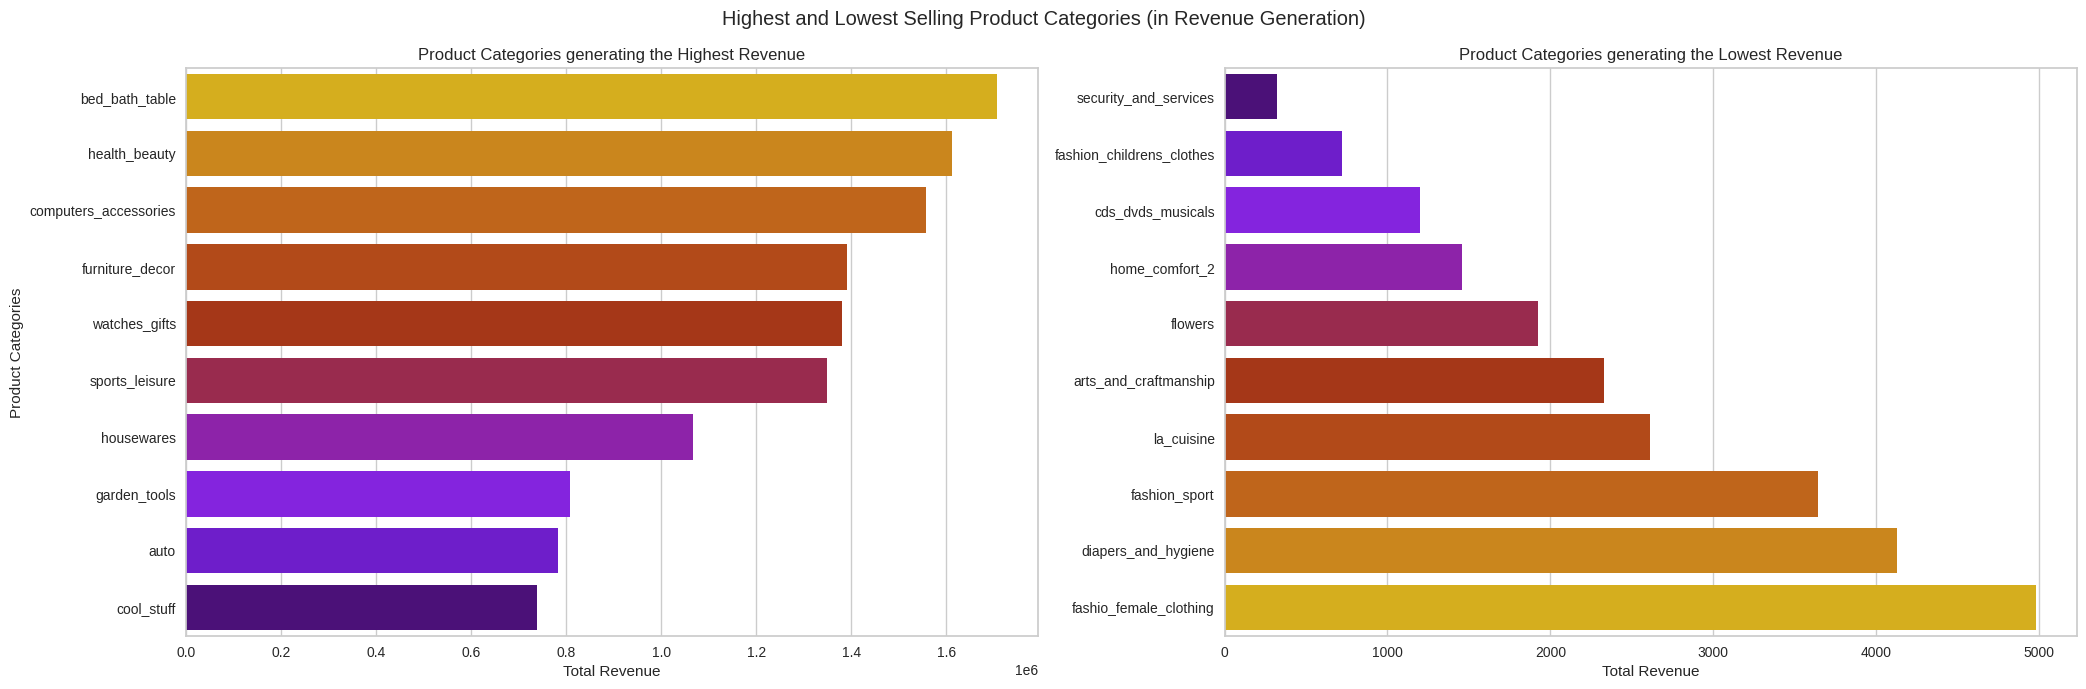

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

# Highest revenue generation
toprevenue_productcat = data.groupby(data["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = toprevenue_productcat, palette = 'gnuplot_r', ax = ax[0])
ax[0].set_xlabel("Total Revenue")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Product Categories generating the Highest Revenue")

# Lowest revenue generation
lowrevenue_productcat = data.groupby(data["product_category_name_english"])["payment_value"].sum().reset_index().sort_values("payment_value", ascending = True).head(10)

sns.barplot(x = "payment_value", y = "product_category_name_english", data = lowrevenue_productcat, palette = 'gnuplot', ax = ax[1])
ax[1].set_xlabel("Total Revenue")
ax[1].set_ylabel("")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Product Categories generating the Lowest Revenue")

# title & adjustments
plt.suptitle("Highest and Lowest Selling Product Categories (in Revenue Generation)")
plt.tight_layout(pad=1)
plt.show()

5. Frequency of Orders

In [210]:
## Create new columns for date,day,time,month:
data['weekday'] = data['order_purchase_timestamp'].dt.day_name() #day of week in str
data['year'] = data['order_purchase_timestamp'].dt.year #year
data['monthday'] = data['order_purchase_timestamp'].dt.day #day of month
data['weekday'] = data['order_purchase_timestamp'].dt.weekday #day of week as int (0=Monday, 1=Tuesday,...)
data['month'] = data['order_purchase_timestamp'].dt.month #month
data['hour'] = data['order_purchase_timestamp'].dt.hour #hour

In [211]:
day_hour = data.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [212]:
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday = day_hour.weekday.map(weekmap)
day_hour.head()

,weekday,hour,freq
0,Mon,0,364
1,Mon,1,145
2,Mon,2,73
3,Mon,3,39
4,Mon,4,24


In [213]:
day_hour=day_hour.pivot(index = 'weekday', columns = 'hour', values = 'freq')

Text(0.5, 1.0, 'Heatmap of transactions over the hour by day')

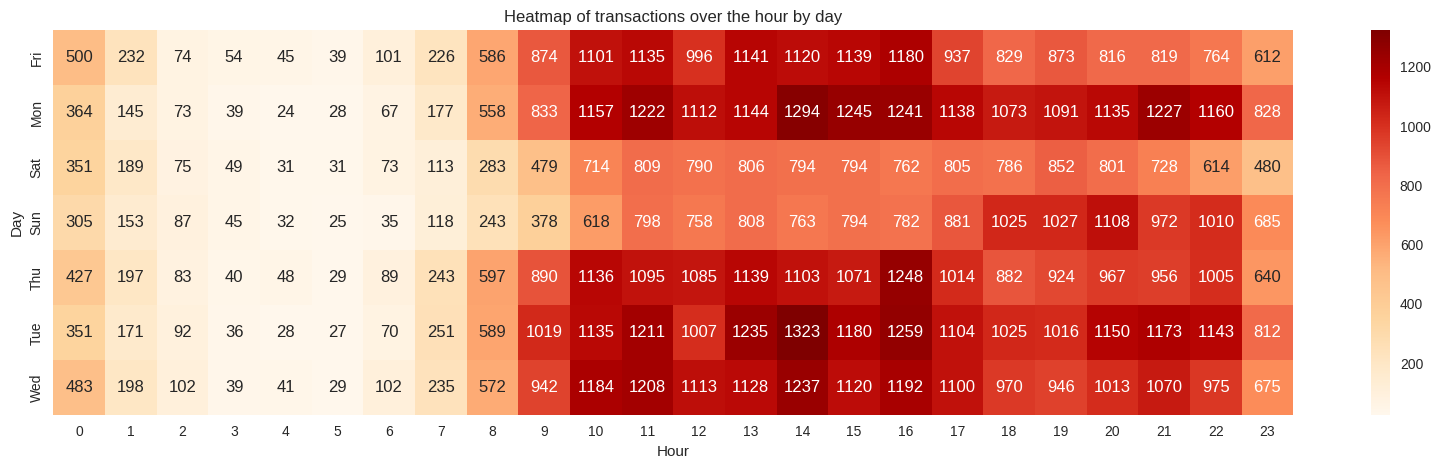

In [214]:
plt.figure(figsize=(20, 5))
ax=sns.heatmap(day_hour, annot = True, fmt = "d", cmap = "OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of transactions over the hour by day")

6. Distribution of Product Delivery time

In [215]:
#Calculating delivery time for all orders:
deliveryTime = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"])

#Convert the timedeltas to seconds
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())

#Convert seconds to days by dividing by the number of seconds in a day (86400 seconds per day)
data['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

#Summarizing the delivery time:
data['deliveryTime_Days'].describe()

,deliveryTime_Days
count,113216.000000
mean,12.440908
std,9.355297
min,0.530000
25%,6.740000
50%,10.190000
75%,15.500000
max,208.350000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



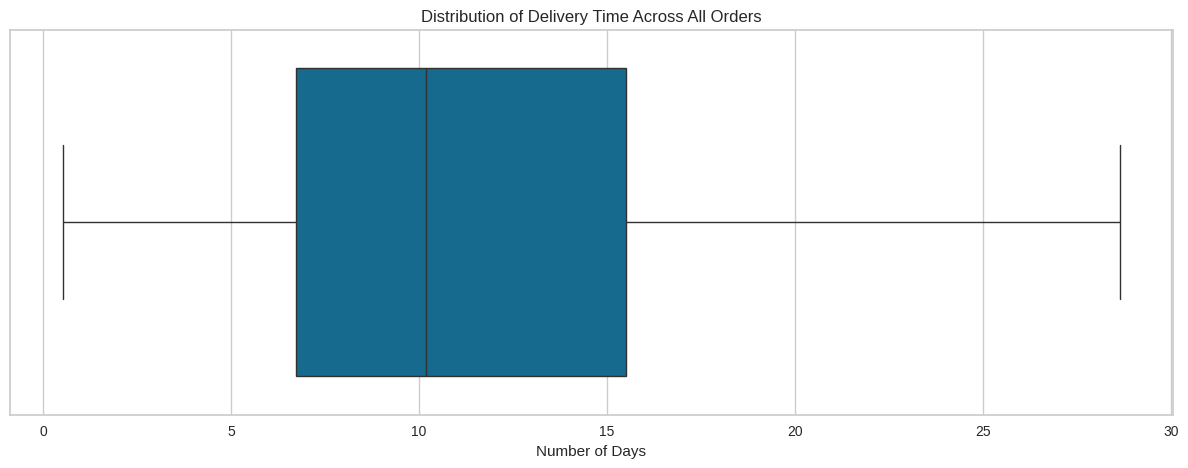

In [216]:
plt.figure(figsize = (15, 5))

sns.boxplot(data.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel("Number of Days")
plt.title('Distribution of Delivery Time Across All Orders')
plt.show()

The avg. delivery time ranges from 7 to 16 days.

7. Effect of Delivery Time on Review Scores

<ipython-input-217-26814871dd49>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

S

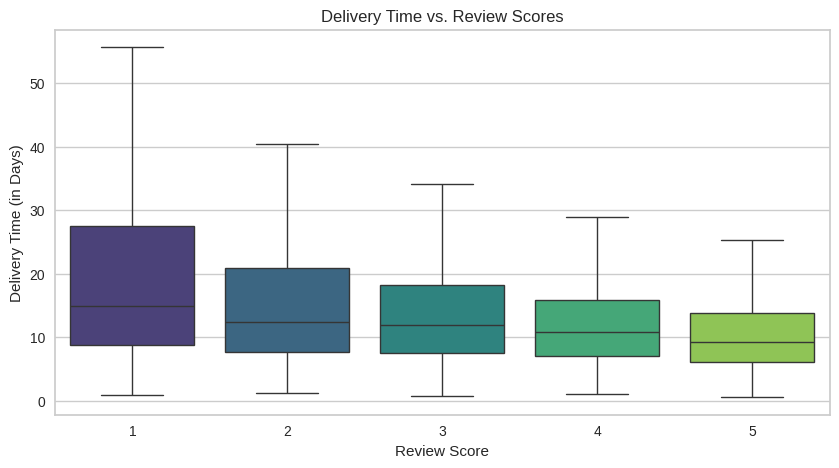

In [217]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "review_score", y = "deliveryTime_Days", data = data, showfliers = False, palette = 'viridis')
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (in Days)")
plt.title("Delivery Time vs. Review Scores")
plt.show()

with increase in delivery time, review scores tend to decrease

8. Best & Worst performing Product Categories acc. to Review Scores

<ipython-input-218-5de7b73b48c9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

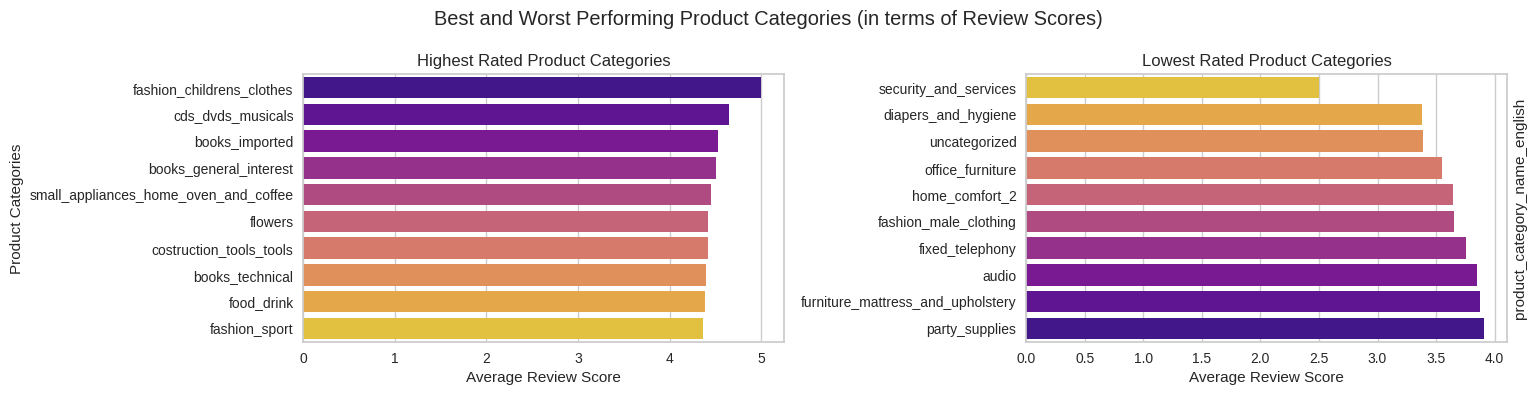

In [218]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15.5, 4))

prodCat_TopReview = data.groupby(data["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = False).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_TopReview, palette = 'plasma', ax = ax[0])
ax[0].set_xlabel("Average Review Score")
ax[0].set_ylabel("Product Categories")
ax[0].set_title("Highest Rated Product Categories")

prodCat_BotReview = data.groupby(data["product_category_name_english"])["review_score"].mean().reset_index().sort_values("review_score", ascending = True).head(10)
sns.barplot(x = "review_score", y = "product_category_name_english", data = prodCat_BotReview, palette = 'plasma_r', ax = ax[1])
ax[1].set_xlabel("Average Review Score")
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Lowest Rated Product Categories")

plt.suptitle("Best and Worst Performing Product Categories (in terms of Review Scores)")
plt.tight_layout(pad = 1)
plt.show()

## **RFM Analysis**

RFM Analysis, bertujuan mengelompokkan pelanggan berdasarkan perilaku pembelian mereka dengan memperhatikan tiga faktor utama:
- Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.

### **Recency**

In [219]:
#Grouping the data by Customer Unique ID to find the latest order of each customer:
df_recency = data.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

#Renaming the column:
df_recency.rename(columns = {"order_purchase_timestamp": "LastPurchaseDate"}, inplace = True)

#Removing time and extracting only date from the datetime field:
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

#Using the last order in the entire dataset as a reference point to calculate recency:
recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,288


### **Frequency**

In [220]:
#Grouping the data by Customer Unique ID to calculate the number of unique Order IDs for every customer.
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()

#Renaming the column:
frequency_df.rename(columns = {"order_id": "Frequency"}, inplace = True)

frequency_df.head()

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


### **Monetary**

In [221]:
#Grouping the data by Customer Unique ID to calulcate the total spending of every customer.
monetary_df = data.groupby('customer_unique_id', as_index = False)['payment_value'].sum()

#Renaming the column:
monetary_df.rename(columns = {"payment_value": "Monetary"}, inplace = True)

monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


### **merging R-F-M metrics**

In [223]:
rfm = df_recency.merge(frequency_df, on = 'customer_unique_id') \
                .merge(monetary_df, on = 'customer_unique_id')

#Dropping the 'Last Purchase Date' column:
rfm.drop('LastPurchaseDate', axis = 1, inplace = True)

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


## **Geospatial Analysis**

In [224]:
# Look at some conbined data

# Look at where customer is
customers_data = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
geo_data = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")

# Make representative point data from zip code of geo_data
geo_rep_data = pd.DataFrame(dict(rep_lat=geo_data.groupby("geolocation_zip_code_prefix").geolocation_lat.mean(),
                                rep_long=geo_data.groupby("geolocation_zip_code_prefix").geolocation_lng.mean())).reset_index()

# Merge geo_rep_data_on customer data
geo_customers = customers_data.merge(geo_rep_data, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")

# Check the how many rows were dropped
print("{} rows({:.1f}%) are missed.".format(len(customers_data)-len(geo_customers), (len(customers_data)-len(geo_customers))/len(geo_customers)*100))
geo_customers

278 rows(0.3%) are missed.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,rep_lat,rep_long
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.975100,-47.142925
...,...,...,...,...,...,...,...,...
99158,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,-23.586003,-46.499638
99159,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,-23.615830,-46.768533
99160,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,-3.734569,-38.510534
99161,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,-29.949839,-51.168494


In [225]:
# Check which rows were dropped from customers_data
missing_data = customers_data[~customers_data.customer_zip_code_prefix.isin(geo_customers.customer_zip_code_prefix.values)]
missing_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP
...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF
97780,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA
98140,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ
98878,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE


In [226]:
# Check if really the zip codes were not in geo_data
geo_data.geolocation_zip_code_prefix.isin(missing_data.customer_zip_code_prefix.values)

,geolocation_zip_code_prefix
0,False
1,False
2,False
3,False
4,False
...,...
1000158,False
1000159,False
1000160,False
1000161,False


At this moment, the missing volume is littele against geo_customers data volume so I ignore the data.
After, consolidating sales data of each customer, I'd like to evaluate this judgement would be correct or not.

In [227]:
# Focus on customer_unique_id becouse customer_id is distributed per order
rev_geo_customers = geo_customers.groupby("customer_unique_id")[["rep_lat", "rep_long"]].mean().reset_index()
rev_geo_customers

,customer_unique_id,rep_lat,rep_long
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,-27.542880,-48.633426
3,0000f6ccb0745a6a4b88665a16c9f078,-1.312214,-48.483159
4,0004aac84e0df4da2b147fca70cf8255,-23.505548,-47.469705
...,...,...,...
95823,fffcf5a5ff07b0908bd4e2dbc735a684,-8.362511,-36.562343
95824,fffea47cd6d3cc0a88bd621562a9d061,-12.217395,-38.959308
95825,ffff371b4d645b6ecea244b27531430a,-11.834552,-55.508110
95826,ffff5962728ec6157033ef9805bacc48,-21.126568,-41.672806


In [228]:
# Focus on customer_unique_id becouse customer_id is distributed per order
rev_geo_customers = geo_customers.groupby("customer_unique_id")[["rep_lat", "rep_long"]].mean().reset_index()
rev_geo_customers

,customer_unique_id,rep_lat,rep_long
0,0000366f3b9a7992bf8c76cfdf3221e2,-23.340235,-46.830140
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559115,-46.787626
2,0000f46a3911fa3c0805444483337064,-27.542880,-48.633426
3,0000f6ccb0745a6a4b88665a16c9f078,-1.312214,-48.483159
4,0004aac84e0df4da2b147fca70cf8255,-23.505548,-47.469705
...,...,...,...
95823,fffcf5a5ff07b0908bd4e2dbc735a684,-8.362511,-36.562343
95824,fffea47cd6d3cc0a88bd621562a9d061,-12.217395,-38.959308
95825,ffff371b4d645b6ecea244b27531430a,-11.834552,-55.508110
95826,ffff5962728ec6157033ef9805bacc48,-21.126568,-41.672806


In [229]:
# Calculate time of mapping process
import time
start = time.perf_counter()

# Plot where the costomers are
import folium
from folium import Marker
from folium.plugins import MarkerCluster

# Create a base map
m_1 = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=3)

# Add points which is randomly selected(n_samples=1,000) on the map
# Make a sample data
import random
sample_idx = random.sample(rev_geo_customers.index.to_list(), k=1000)
sample_df = rev_geo_customers.loc[sample_idx]

# Add points on the map
mc = MarkerCluster()
for idx, row in sample_df.iterrows():
    mc.add_child(Marker([row["rep_lat"], row["rep_long"]]))
m_1.add_child(mc)

# Add title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Show Where Customer Is</b></h3>
             '''
m_1.get_root().html.add_child(folium.Element(title_html))

# Show the map
display(m_1)

# Print time of the process
print("The process consumes {:.2f} seconds.".format(time.perf_counter()-start))

The process consumes 0.66 seconds.


In [232]:
# Look at sales against each order

# Get sales data
order_sales = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")[["order_id", "order_item_id", "price"]]

# Get customer data against order
order_customers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")[["order_id", "customer_id"]]

# Make customers sales data by oreder_sales and order_customer
customers_sales = pd.merge(order_sales, order_customers, on="order_id")

# Check how many rows are dropped
print("{}rows({:.1f})% are missed on customers_sales.".format(len(order_sales)-len(customers_sales), (len(order_sales)-len(customers_sales))/len(order_sales)*100))

# Add geodata
geo_customers_sales = pd.merge(customers_sales, geo_customers, on="customer_id")

# Check how many rows are dropped
print("{}rows({:.1f})% are missed on customers_sales.".format(len(customers_sales)-len(geo_customers_sales), (len(customers_sales)-len(geo_customers_sales))/len(customers_sales)*100))

geo_customers_sales

0rows(0.0)% are missed on customers_sales.
302rows(0.3)% are missed on customers_sales.


,order_id,order_item_id,price,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,rep_lat,rep_long
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15775,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,1,199.00,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,35661,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,12952,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,13226,-23.243402,-46.827614
...,...,...,...,...,...,...,...,...,...,...,...
112343,fffc94f6ce00a00581880bf54a75a037,1,299.99,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,65077,-2.497993,-44.297761
112344,fffcd46ef2263f404302a634eb57f7eb,1,350.00,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,81690,-25.566904,-49.309115
112345,fffce4705a9662cd70adb13d4a31832d,1,99.90,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,4039,-23.597794,-46.643923
112346,fffe18544ffabc95dfada21779c9644f,1,55.99,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,13289,-23.040252,-46.979782


In [233]:
# Check the sales value of the missing data against whole data
missing_data = customers_sales.loc[~customers_sales.customer_id.isin(geo_customers_sales.customer_id)]
print("{:.3f}% of sales value on customers_sales was missed.".format(missing_data.price.sum()/customers_sales.price.sum()))
missing_data

0.003% of sales value on customers_sales was missed.


,order_id,order_item_id,price,customer_id
241,009fa9bd0d92710e840793bfefa80867,1,84.99,ed19fa6ce948d52be769926c2baaa17c
799,01d3d4cb8c553d507dfd26fbd8b41e95,1,114.94,814dfd64a142fe2564faef3932b676b9
1032,02623e799dcc1e41066ddfe4af591f24,1,52.99,5ffea9b2ecf7eb23b4db0b1c4f76765d
1152,02acaa2a6f24e9c4e0bec7141b65f29b,1,29.90,198f8a1c41eaeb274fc8b25993320f18
1816,041cba819a99569f87996b65b73ea82e,1,23.99,98f405f18fec61e1a61037c344213e26
...,...,...,...,...
110420,fae78da81b7ad4a5389732f61e0264ef,3,18.90,90b17430567733d3e005cc92466c213a
110421,fae78da81b7ad4a5389732f61e0264ef,4,18.90,90b17430567733d3e005cc92466c213a
111537,fd5c73fb6edc88486582bf0a0bb989aa,1,199.99,c348e5bd22ca24a447a221536c71d8b3
112018,fe784ed3dfc728fd4de44fa9918fe1eb,1,39.90,534ae76adc5da4b4f9c7b505a756d59d


At this stage, I can guss the missing data would cause no big impact even if I discard the data because sales value of the data is tiny against whole sales value.
So, I'd like to decide to ignore the data.

In [234]:
# Check the data construction
geo_customers_sales.loc[geo_customers_sales.geolocation_zip_code_prefix == 28013]

,order_id,order_item_id,price,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,rep_lat,rep_long
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
27467,3ea310e0ca8eaa2d771f9ae489e6535e,1,145.00,ee55320c214a7ac7be7f488c6a63da0d,1256191557354bf29497a6f8ea3be86d,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
29724,43c564b825003473af9a68138631d388,1,75.35,7a9e4631c3fa2487b3a4d1a9becf3701,0e3c753956e35026b965d9ac3590c5af,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
34405,4e0158c628911a5f52cfbc38242c0d08,1,19.90,c7858f425c53bf289b58bbca491fdfb6,e19295fe39010feeca6ef77ac61275d9,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
36814,53d1f26612893ef17dbc27d69a8382e4,1,129.50,2622cbd2edf907bb373c679b09c01c01,2583866968d72b2503e08837f6698689,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
40560,5c94ad4e194c0e6794688a9d2b9ea94b,1,29.90,ad6acb9e0ffc35906b64d488bbdb6d5a,ca50300f552f1bc9b5aa898a29382d69,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
79827,b61a2f7167a516d76088020bc63b4f7b,1,200.00,e625d447d6605488f6e7b8bba3024e08,0e3c753956e35026b965d9ac3590c5af,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
82223,bb4eb0196897c20281a61f75ce23211c,1,96.00,c7d65abc07da65a413738fc854d8112a,81fde78227bbac716944e215b6895639,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
83062,bd31b009e1dbc47fc7c250b1e2cf5440,1,52.90,2c23918ee23c1406b9cb5f78d4b2062a,8d500d527a1d67efec12faf28b61885b,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633
98385,dfbae856658ed0da74731056554e1b77,1,61.90,6293c0e2de01a0b4c70dd59ed6f3a05a,8f3dfd04811555a6f7f350e1389c0394,28013,campos dos goytacazes,RJ,28013,-21.762775,-41.309633


In [235]:
# Check total number of unique "order_id" and "customer_id" are equal
print(len(geo_customers_sales.order_id.unique()))
print(len(geo_customers_sales.customer_id.unique()))

98392
98392


In [236]:
# Make data frame for Purchase Price data

# Price is distributed per row (item in order) so the data should be summed per order
purchase_price_df_price = geo_customers_sales.groupby("customer_id")["price"].sum().reset_index()
# Rename summed price data as total_spending for avoiding confuse
purchase_price_df_price = purchase_price_df_price.rename(columns={"price": "purchase_price"})
# Geo data should be same per row so the data should be meaned
purchase_price_df_geo = geo_customers_sales.groupby("customer_id")[["rep_lat", "rep_long"]].mean().reset_index()
# Assemble above two data
purchase_price_df = pd.merge(purchase_price_df_price, purchase_price_df_geo, on="customer_id")
purchase_price_df

,customer_id,purchase_price,rep_lat,rep_long
0,00012a2ce6f8dcda20d059ce98491703,89.80,-23.499063,-46.767939
1,000161a058600d5901f007fab4c27140,54.90,-20.469754,-45.123242
2,0001fd6190edaaf884bcaf3d49edf079,179.99,-18.706581,-40.406384
3,0002414f95344307404f0ace7a26f1d5,149.90,-21.770599,-43.355230
4,000379cdec625522490c315e70c7a9fb,93.00,-23.738709,-46.689333
...,...,...,...,...
98387,fffcb937e9dd47a13f05ecb8290f4d3e,78.00,-23.686344,-46.745879
98388,fffecc9f79fd8c764f843e9951b11341,54.90,-29.631686,-50.834574
98389,fffeda5b6d849fbd39689bb92087f431,47.90,-22.961345,-43.213641
98390,ffff42319e9b2d713724ae527742af25,199.90,-23.606135,-46.757486


In [237]:
# Check distribution of price on above data
purchase_price_df.purchase_price.describe()

,purchase_price
count,98392.000000
mean,137.753676
std,210.695389
min,0.850000
25%,45.900000
50%,86.900000
75%,149.900000
max,13440.000000


In [238]:
# Look at purchase price distribution by bubble map

# Calculate tume of the process
start =time.perf_counter()

# Create a base map
m_2 = folium.Map(location=[-15, -55], tiles="cartodbpositron", zoom_start=3)

# Make color palette
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

def make_palette(n_samples, cmap):
    n_samples = n_samples
    color_map = plt.get_cmap(cmap)
    palette = []
    for c in np.linspace(0.0, 1.0, n_samples*2):
        color_code = rgb2hex(color_map(c))
        palette.append(color_code)
    return palette[n_samples:]

# Make color producer function
def color_producer(val):
    if val <= 45.9:
        return make_palette(2, "Blues")[0]
    if val <= 86.9:
        return make_palette(2, "Blues")[1]
    if val <= 137.8:
        return make_palette(1, "Wistia")[0]
    if val <= 149.9:
        return make_palette(2, "Reds")[0]
    else:
        return make_palette(2, "Reds")[1]

# Add points which is randomly selected(n_samples=1,000) on the map
# Make a sample data
import random
sample_idx = random.sample(purchase_price_df.index.to_list(), k=1000)
sample_df = purchase_price_df.loc[sample_idx]

# Add bubble map to base map
from folium import Circle

for i in range(0, len(sample_df)):
    Circle(
        location=[sample_df.iloc[i]["rep_lat"], sample_df.iloc[i]["rep_long"]],
        radius=sample_df.iloc[i]["purchase_price"],
        color=color_producer(sample_df.iloc[i]["purchase_price"]),
        popup=sample_df.iloc[i]["purchase_price"]
    ).add_to(m_2)

# Make function for add categorical legend
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")
    color_by_label = dict(zip(labels, colors))
    legend_categories = ""
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
    css = """
    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """
    folium_map.get_root().header.add_child(folium.Element(script + css))
    return folium_map

# Add categorical legend on the map
# Make color_df
color_df = pd.DataFrame(dict(purchase_price=["Very Low(<= 45.9 (25% point))", "Low(<= 86.9 (50% point))", "Middle(<= 137.8 (mean))", "High(<= 149.9(75% point))", "Very High(> 149.9)"],
                            color=[make_palette(2, "Blues")[0], make_palette(2, "Blues")[1], make_palette(1, "Wistia")[0], make_palette(2, "Reds")[0], make_palette(2, "Reds")[1]]))

m_2 = add_categorical_legend(m_2, 'purchase_price',
                             colors = color_df.color.values.tolist(),
                           labels = color_df.purchase_price.values.tolist())

# Add title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Show Purchase Price<br>(n_samples=1,000)</b></h3>
             '''
m_2.get_root().html.add_child(folium.Element(title_html))

# Display the map
display(m_2)

# Check the time
print("The process consumes {:.2f} seconds.".format(time.perf_counter()-start))

The process consumes 3.32 seconds.
